In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np



In [2]:
data=pd.read_csv("C:\\Users\\kiril\\Downloads\\Telegram Desktop\\AmesHousing.csv")
data=data.fillna(value=0)
data['Yr Sold']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2925    2006
2926    2006
2927    2006
2928    2006
2929    2006
Name: Yr Sold, Length: 2930, dtype: int64

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data['Yr Sold']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2925    2006
2926    2006
2927    2006
2928    2006
2929    2006
Name: Yr Sold, Length: 2930, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
categorial_features=data.select_dtypes(include=['object']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])
categorial_features


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 [Text(0, 0.5, 'Order'),
  Text(0, 1.5, 'PID'),
  Text(0, 2.5, 'MS SubClass'),
  Text(0, 3.5, 'Lot Frontage'),
  Text(0, 4.5, 'Lot Area'),
  Text(0, 5.5, 'Overall Qual'),
  Text(0, 6.5, 'Overall Cond'),
  Text(0, 7.5, 'Year Built'),
  Text(0, 8.5, 'Year Remod/Add'),
  Text(0, 9.5, 'Mas Vnr Area'),
  Text(0, 10.5, 'BsmtFin SF 1'),
  Text(0, 11.5, 'BsmtFin SF 2'),
  Text(0, 12.5, 'Bsmt Unf SF'),
  Text(0, 13.5, 'Total Bsmt SF'),
  Text(0, 14.5, '1st Flr SF'),
  Text(0, 15.5, '2nd Flr SF'),
  Text(0, 16.5, 'Low Qual Fin SF'),
  Text(0, 17.5, 'Gr Liv Area'),
  Text(0, 18.5, 'Bsmt Full Bath'),
  Text(0, 19.5, 'Bsmt Half Bath'),
  Text(0, 20.5, 'Full Bath'),
  Text(0, 21.5, 'Half Bath'),
  Text(0, 22.5, 'Bedroom AbvGr'),
  Text(0, 23.

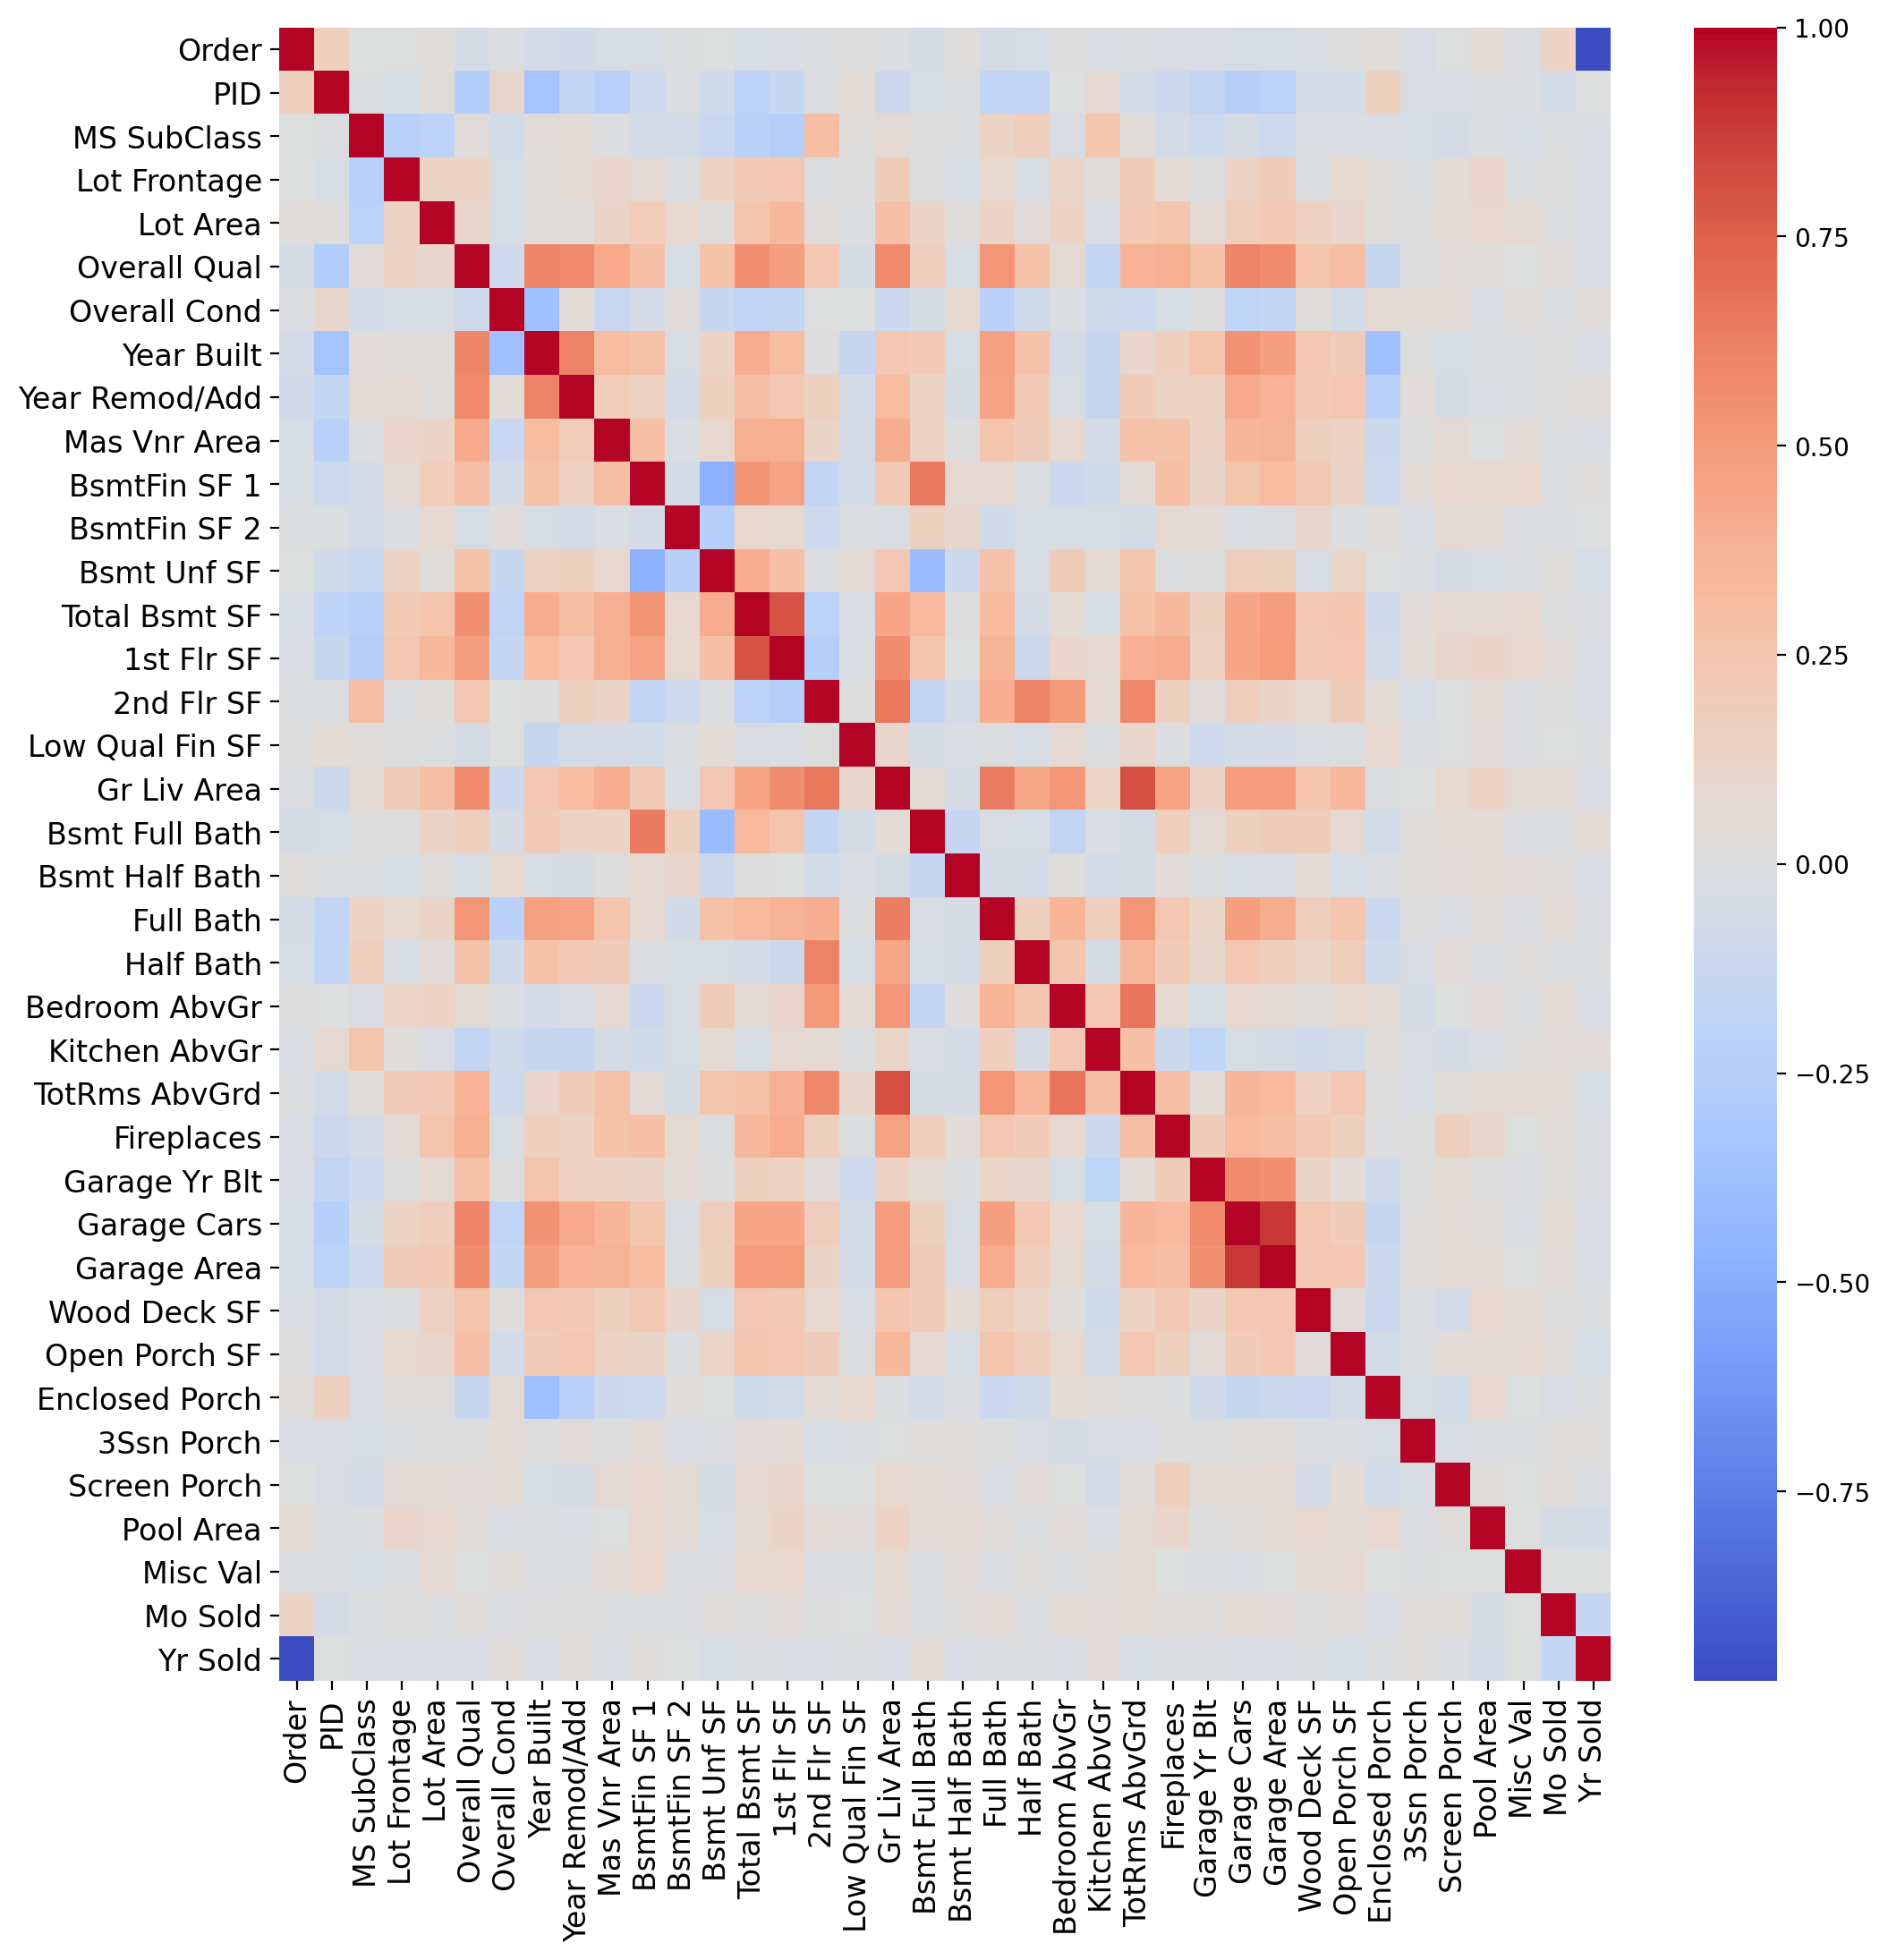

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12),dpi=200)
sns.heatmap(data=data.drop('SalePrice', axis=1).corr(), cmap="coolwarm")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [7]:
#correlation_matrix = data.corr().abs()
correlation_matrix=data.corr()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8 ) or any(upper[column]<-0.8)]
#to_drop = [column for column in upper.columns if any(upper[column] > 0.8 )]

print(to_drop)
data = data.drop(columns=to_drop)
#print(data)



['1st Flr SF', 'TotRms AbvGrd', 'Garage Area', 'Yr Sold']


In [8]:
print(correlation_matrix)


                    Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797      0.008748  0.031354   
PID              0.173593  1.000000    -0.001281     -0.038104  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.233959 -0.204613   
Lot Frontage     0.008748 -0.038104    -0.233959      1.000000  0.136862   
Lot Area         0.031354  0.034868    -0.204613      0.136862  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.128840  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.034675 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.026130  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.069509  0.021682   
Mas Vnr Area    -0.031045 -0.225672     0.003634      0.109858  0.125950   
BsmtFin SF 1    -0.032268 -0.098674    -0.059767      0.067034  0.191692   
BsmtFin SF 2    -0.002758 -0.001245    -0.070847     -0.005254  0.083198   
Bsmt Unf SF 

In [9]:
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice
0,-1.731460,-0.997164,-0.877005,RL,2.488592,2.744381,Pave,0,IR1,Lvl,...,-0.285354,-0.063031,0,0,0,-0.089422,-0.448057,WD,Normal,0.428229
1,-1.730277,-0.996904,-0.877005,RH,0.667355,0.187097,Pave,0,Reg,Lvl,...,1.854530,-0.063031,0,MnPrv,0,-0.089422,-0.079602,WD,Normal,-0.948957
2,-1.729095,-0.996899,-0.877005,RL,0.697212,0.522814,Pave,0,IR1,Lvl,...,-0.285354,-0.063031,0,0,Gar2,21.985725,-0.079602,WD,Normal,-0.110125
3,-1.727913,-0.996888,-0.877005,RL,1.055488,0.128458,Pave,0,Reg,Lvl,...,-0.285354,-0.063031,0,0,0,-0.089422,-0.816513,WD,Normal,0.791305
4,-1.726731,-0.992903,0.061285,RL,0.488217,0.467348,Pave,0,IR1,Lvl,...,-0.285354,-0.063031,0,MnPrv,0,-0.089422,-1.184969,WD,Normal,0.113980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.726731,1.106582,0.530430,RL,-0.616467,-0.280621,Pave,0,IR1,Lvl,...,-0.285354,-0.063031,0,GdPrv,0,-0.089422,-1.184969,WD,Normal,-0.479462
2926,1.727913,1.106588,-0.877005,RL,-1.721152,-0.160296,Pave,0,IR1,Low,...,-0.285354,-0.063031,0,MnPrv,0,-0.089422,-0.079602,WD,Normal,-0.623440
2927,1.729095,1.107245,0.647716,RL,0.129941,0.037199,Pave,0,Reg,Lvl,...,-0.285354,-0.063031,0,MnPrv,Shed,1.146786,0.288854,WD,Normal,-0.610920
2928,1.730277,1.110954,-0.877005,RL,0.577786,-0.017506,Pave,0,Reg,Lvl,...,-0.285354,-0.063031,0,0,0,-0.089422,-0.816513,WD,Normal,-0.135165


In [10]:
numeric_features

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

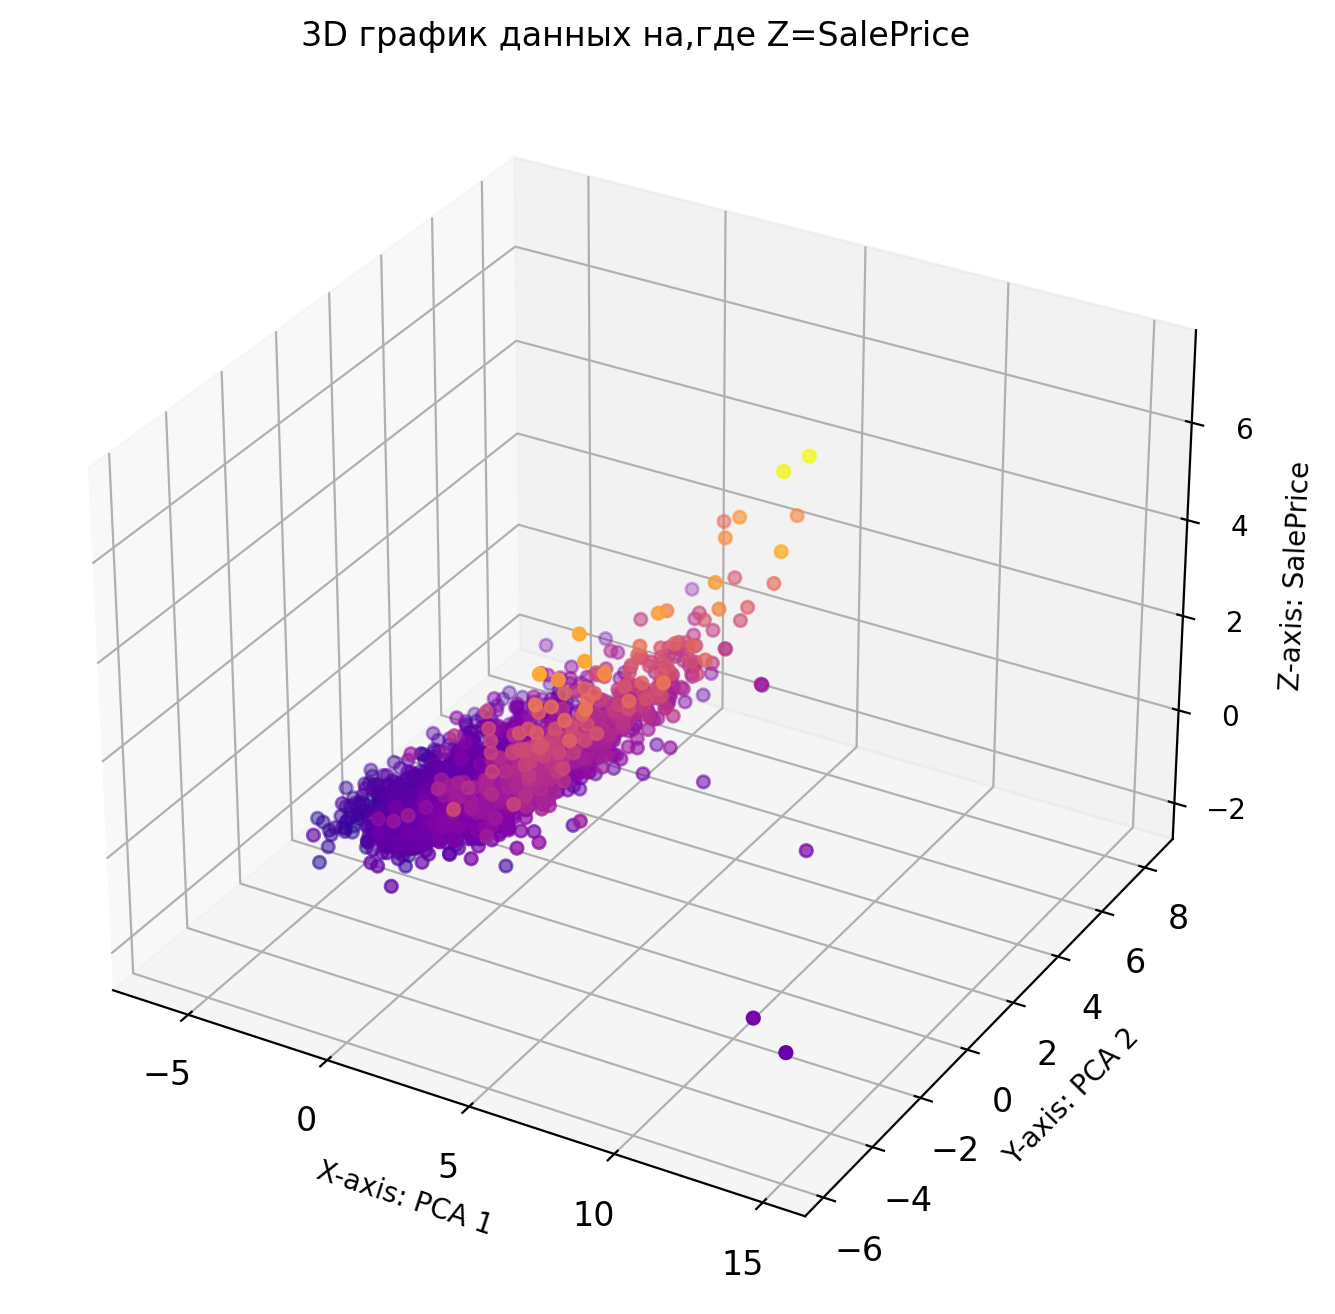

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns #так как я удалил  эти признаки  ['1st Flr SF', 'TotRms AbvGrd', 'Garage Area', 'Yr Sold'],
                                                                            #то обновляем список

X = data[numeric_features].drop('SalePrice',axis=1)  
y = data["SalePrice"]  


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig=plt.figure(figsize=(12,8),dpi=200)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs=X_pca[:,0], ys=X_pca[:,1], zs=y,c=y,cmap="plasma")
ax.set_xlabel('X-axis: PCA 1')
ax.set_ylabel('Y-axis: PCA 2')
ax.set_zlabel('Z-axis: SalePrice')
plt.title('3D график данных на,гдe Z=SalePrice',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
RMSE

0.4868315335152117

In [14]:
np.logspace(-4,1,1000)


array([1.00000000e-04, 1.01159111e-04, 1.02331658e-04, 1.03517796e-04,
       1.04717682e-04, 1.05931476e-04, 1.07159340e-04, 1.08401436e-04,
       1.09657929e-04, 1.10928986e-04, 1.12214777e-04, 1.13515471e-04,
       1.14831241e-04, 1.16162263e-04, 1.17508713e-04, 1.18870770e-04,
       1.20248614e-04, 1.21642429e-04, 1.23052400e-04, 1.24478715e-04,
       1.25921561e-04, 1.27381132e-04, 1.28857621e-04, 1.30351224e-04,
       1.31862140e-04, 1.33390569e-04, 1.34936714e-04, 1.36500781e-04,
       1.38082977e-04, 1.39683512e-04, 1.41302599e-04, 1.42940453e-04,
       1.44597292e-04, 1.46273336e-04, 1.47968806e-04, 1.49683929e-04,
       1.51418933e-04, 1.53174046e-04, 1.54949504e-04, 1.56745541e-04,
       1.58562396e-04, 1.60400311e-04, 1.62259529e-04, 1.64140297e-04,
       1.66042866e-04, 1.67967487e-04, 1.69914417e-04, 1.71883914e-04,
       1.73876240e-04, 1.75891659e-04, 1.77930439e-04, 1.79992851e-04,
       1.82079168e-04, 1.84189668e-04, 1.86324631e-04, 1.88484341e-04,
      

In [15]:
np.linspace(-1,1,10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

c:\Users\kiril\anaconda3\envs\My_ML_Stepik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.170457059315773, tolerance: 0.035818158110844614
  positive)
c:\Users\kiril\anaconda3\envs\My_ML_Stepik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.66714497712763, tolerance: 0.035818158110844614
  positive)
c:\Users\kiril\anaconda3\envs\My_ML_Stepik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.55520852936988, tolerance: 0.035818158110844614
  positive)
c:\Users\kiril\anaconda3\envs\My_ML_Stepik\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objectiv

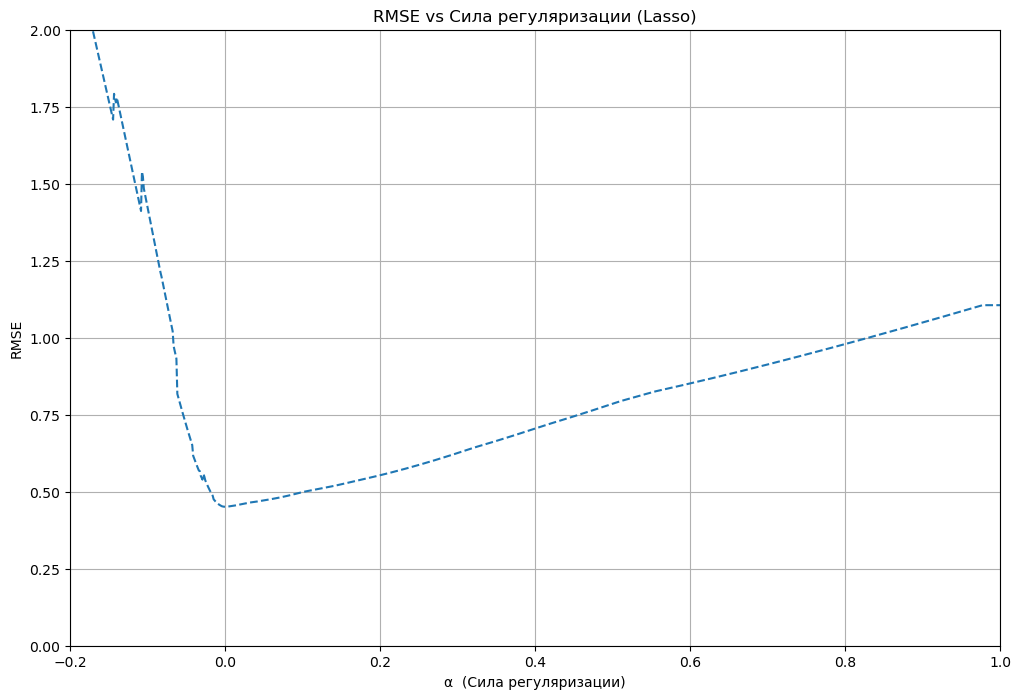

In [16]:
from sklearn.linear_model import Lasso
alphas=np.linspace(-0.2,1,1000)

rmse_scores=[]
for i in alphas:
    lasso_model=Lasso(alpha=i,max_iter=1000)
    lasso_model.fit(X_test,y_test)
    y_pred=lasso_model.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test,y_pred)))
plt.figure(figsize=(12,8))
plt.plot(alphas,rmse_scores,linestyle='--')
plt.xscale('linear')
plt.xlabel('α  (Сила регуляризации)')
plt.ylabel('RMSE')
plt.xlim(left=-0.2,right=1)
plt.ylim(bottom=0,top=2)
plt.title('RMSE vs Сила регуляризации (Lasso)')
plt.grid(True)

y = α0 + α1*x1 + 2*α2 + ... + αn*xn 

In [17]:
optimal_alpha=alphas[np.argmin(rmse_scores)]#аргмином берем индекс минимального значения из rmse_scores и по этому индексу берем альфа при 
                                            #при котром величина rmse максимальна близка к 0                                                
#np.argmin(rmse_scores)
#optimal_alpha
lasso_model=Lasso(alpha=optimal_alpha)
lasso_model.fit(X_train, y_train)

feature_importance = pd.Series(data=lasso_model.coef_, index=X.columns)#пихаем коээфиценты альфы и названия прихнаков
most_important_feature = feature_importance.abs().idxmax()

print(f'Наиболее важный признак: {most_important_feature}')
print(feature_importance.sort_values(ascending=False))

Наиболее важный признак: Gr Liv Area
Gr Liv Area        0.389178
Overall Qual       0.307310
Garage Cars        0.131316
Year Built         0.130089
BsmtFin SF 1       0.079261
Overall Cond       0.064627
Mas Vnr Area       0.063738
Total Bsmt SF      0.055250
Year Remod/Add     0.049404
Screen Porch       0.048634
Lot Area           0.044178
Bsmt Full Bath     0.040953
Wood Deck SF       0.034555
Fireplaces         0.025437
Order              0.020741
Lot Frontage       0.020075
Enclosed Porch     0.013393
BsmtFin SF 2       0.009832
2nd Flr SF         0.005116
Full Bath          0.001527
Mo Sold            0.001346
3Ssn Porch        -0.000000
Bsmt Unf SF       -0.000000
Open Porch SF     -0.002860
Bsmt Half Bath    -0.008223
Low Qual Fin SF   -0.017221
Half Bath         -0.017772
Pool Area         -0.018008
PID               -0.020751
Kitchen AbvGr     -0.034389
Misc Val          -0.063643
Garage Yr Blt     -0.069267
Bedroom AbvGr     -0.076766
MS SubClass       -0.083851
dtype: floa

In [18]:
print(optimal_alpha)

0.000600600600600576


In [19]:
np.argmin(rmse_scores)

167